# Combined Project

<b>Goal:
The main goal of the project is combining the data and get insights from it. </b>

Preprocess data was stored in the SQL Database. We exported the data from MySQL database and stored in different dataframes. We tried different combinations of datasets and plotted different graphs to match the project goal. We have given a limit to exported data as to work on our local machines. For higher end machine we can increase our limit of data for exporting.  

### 1. Importing Libraries

In [97]:
import warnings
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", "(?s).*MatplotlibDeprecationWarning.*", category=UserWarning)
from sqlalchemy import create_engine

### 2. Connect to MySQL Database

In [96]:
engine = create_engine("mysql+pymysql://root:AI@123@127.0.0.1/starbucksdata")

### 3. Export SQL Data

Export SQL database to different dataframes. We stored <b></b> <b>Location</b> data in <b>location_df</b>, <b>Twitter</b> data in <b>tweeter_df</b>, <b>Weather</b> data in <b>weather_df</b> and <b>Stock</b> data in <b>stock_df</b>

In [1]:
location_df = pd.read_sql_query("SELECT * FROM locationss w where w.country='CA'  limit 1000", engine)
tweeter_df = pd.read_sql_query("SELECT * FROM twitter_data w where w.month=4 and w.year=2021 limit 1000", engine)
weather_df = pd.read_sql_query("SELECT * FROM weather w where w.day=27 and w.month=4 and w.year=2021 and w.country='CA' limit 100", engine)
stock_df = pd.read_sql_query("SELECT * FROM stock_data w where w.day=27 and w.month=4 and w.year=2021 limit 1000", engine)

### 4. Selected only required columns

In [57]:
location_column = ["city","country","country_name"]
twitter_column = ["day","month","year","user","is_verified","location","followers_count","friends_count","clean_tweet",
                   "sentiment"]
weather_column = ["city","avg_temp","country","weather_status","day","month","year"]

In [58]:
location_df = location_df[location_column]
tweeter_df = tweeter_df[twitter_column]
weather_df = weather_df[weather_column]

### 5. Merged Dataframes 

In [11]:
""" Here we merged Twitter Dataframe and Stocks dataframe on "day", "month" and "year" column 
"""
tweet_stock = pd.merge(stock_df, tweeter_df , on=["day","month","year"])

In [104]:
tweet_stock.to_csv('{}.csv'.format("tweet_stock"),index=False)

In [48]:
""" Here we merged Weather dataframe and Stocks dataframe on "day", "month" and "year" column 
"""
weather_stock = pd.merge(stock_df, weather_df , on=["day","month","year"])

In [105]:
weather_stock.to_csv('{}.csv'.format("weather_stock"),index=False)

In [61]:
""" Here we merged Weather dataframe and Location dataframe on "day", "month" and "year" column 
"""
weather_location = pd.merge(weather_df, location_df , on=["country"])

In [106]:
weather_location.to_csv('{}.csv'.format("weather_location"),index=False)

### 6. Data Visualization

#### 6.1 Weather Status vs Stock Price

C:\Users\Shubham\anaconda3\envs\starbucks-analysis\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



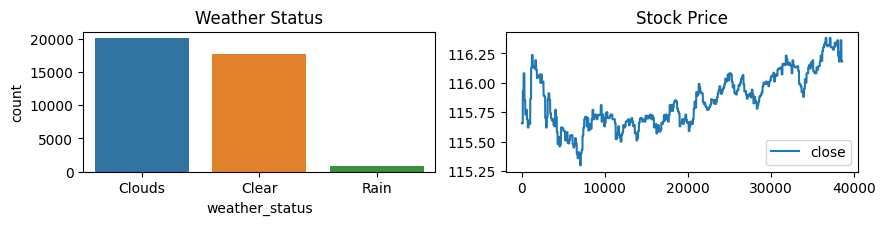

In [99]:
""" We tried to find patterns between Weather Status and Stock Price
"""
plt.subplot(2, 2, 1)
sns.countplot(weather_stock["weather_status"])
plt.title("Weather Status")
plt.subplot(2, 2, 2)
weather_stock['close'].plot(legend=True,figsize=(10,4))
plt.title("Stock Price")
plt.show()

#### 6.2 Sentiment vs Stock Price

C:\Users\Shubham\anaconda3\envs\starbucks-analysis\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



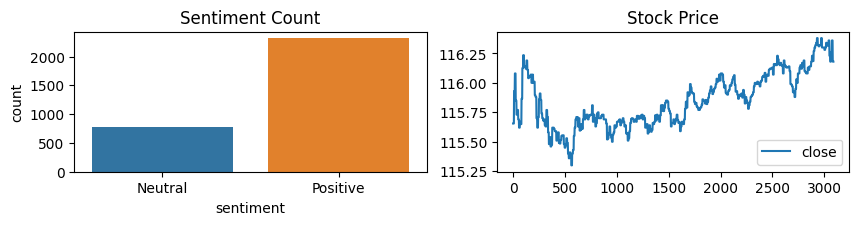

In [100]:
""" We tried to find patterns between Weather Status and Stock Price
"""
plt.subplot(2, 2, 1)
sns.countplot(tweet_stock["sentiment"])
plt.title("Sentiment Count")
plt.subplot(2, 2, 2)
tweet_stock['close'].plot(legend=True,figsize=(10,4))
plt.title("Stock Price")
plt.show()

#### 6.3 Sentiment vs Weather Status

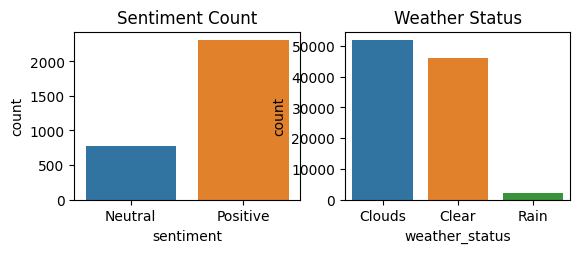

In [101]:
""" We tried to find patterns between Sentiment and Weather Status
"""
plt.subplot(2, 2, 1)
sns.countplot(tweet_stock["sentiment"])
plt.title("Sentiment Count")
plt.subplot(2, 2, 2)
sns.countplot(weather_location["weather_status"])
plt.title("Weather Status")
plt.show()

#### 6.4 Weather Status vs Average Temperature

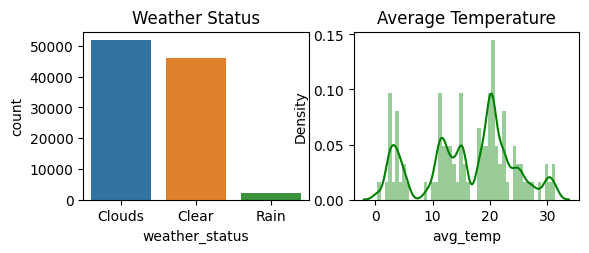

In [102]:
""" We tried to find patterns between Weather Status and Average Temperature
"""
plt.subplot(2, 2, 1)
sns.countplot(weather_location["weather_status"])
plt.title("Weather Status")
plt.subplot(2, 2, 2)
sns.distplot(weather_location.avg_temp, color = 'green')
plt.title("Average Temperature")
plt.show()

<b> Detail description of the graphs are written in Project report.